In [656]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

 This line does the following:
It defines a variable named medical_charges_url.

The variable stores a URL string — specifically, a link to a .csv file containing medical insurance charges data.

In [657]:
from urllib.request import urlretrieve

In [658]:
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x25169d2a6d0>)

What this line does:
Downloads the file from the web address stored in medical_charges_url

Saves it locally on your computer as medical.csv in your current working directory (usually the same folder where your .ipynb or .py file is)

In [659]:
!pip install pandas --quiet



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Why use Pandas?
Because it's perfect for:

Loading datasets (pd.read_csv("file.csv"))

Viewing and analyzing data tables

Cleaning and transforming data

Plotting basic graphs (via .plot() with matplotlib)



In [660]:
import pandas as pd

In [661]:
medical_df = pd.read_csv('medical.csv')

This reads the CSV file you previously downloaded (medical.csv)

It loads it into a Pandas DataFrame called medical_df

In [662]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


This displays the full DataFrame when run in a notebook.

In [663]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


This command gives you a quick summary of your DataFrame, including:



In [664]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


This command gives you descriptive statistics for all numeric columns in your DataFrame.

In [665]:
!pip install plotly matplotlib seaborn --quiet


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [666]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [667]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [668]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [669]:
fig = px.histogram(medical_df, 
                   x='age', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Age',
                   )
fig.update_layout(bargap=0.1)
fig.show()

In [670]:
fig = px.histogram(medical_df, 
                   x='bmi', 
                   marginal='box', 
                   color_discrete_sequence=['red'], 
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

In [671]:
fig = px.histogram(medical_df,
                   x = 'charges',
                   marginal= 'box',
                   color='smoker',
                   color_discrete_sequence=['green', 'grey'],
                   title= 'annual medical charge' )
fig.update_layout(bargap=0.1)
fig.show() 

In [672]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [673]:
px.histogram(medical_df, x='smoker', color='sex', title='smoker')



In [674]:
fig = px.histogram(
    medical_df,
    x='sex',
    title='Distribution of Sex'
)
fig.update_layout(bargap=0.3)
fig.show()

In [675]:
fig = px.histogram(
    medical_df,
    x='region',
    title='Distribution of Region'
)
fig.update_layout(bargap=0.3)
fig.show()


In [676]:
fig = px.histogram(
    medical_df,
    x='children',
    title='Distribution of Number of Children',
)
fig.update_layout(bargap=0.2)
fig.show()


In [677]:
fig = px.scatter(medical_df, x='age', y='charges',color='smoker',opacity=0.8, hover_name='sex',title= 'age vs charges')
fig.update_traces(marker_size=5)

fig.show()

From here we can see two trends 
1. For non-smokers charges increase as they age
2. Smokers have higher charges compared to non smokers 

In [678]:
fig = px.scatter(medical_df,
                 x= 'bmi',
                 y= 'charges',
                 color='smoker',
                 title= 'bmi vs charges')
fig.update_traces(marker_size=4)
fig.show()

### Correlation

As you can tell from the analysis, the values in some columns are more closely related to the values in "charges" compared to other columns. E.g. "age" and "charges" seem to grow together, whereas "bmi" and "charges" don't.

This relationship is often expressed numerically using a measure called the _correlation coefficient_, which can be computed using the `.corr` method of a Pandas series.

In [679]:
medical_df.charges.corr(medical_df.age)

np.float64(0.2990081933306476)

In [680]:
medical_df.charges.corr(medical_df.bmi)

np.float64(0.19834096883362878)

In [681]:
medical_df.charges.corr(medical_df. children)

np.float64(0.06799822684790469)

In [682]:
medical_df.charges.corr(medical_df.age)

np.float64(0.2990081933306476)

To compute the correlation for categorical columns, they must first be converted into numeric columns.

In [683]:
smoker_values = { 'no' :0,'yes':1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

np.float64(0.7872514304984782)

## Linear Regression using a Single Feature

We now know that the "smoker" and "age" columns have the strongest correlation with "charges". Let's try to find a way of estimating the value of "charges" using the value of "age" for non-smokers. First, let's create a data frame containing just the data for non-smokers.

In [684]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

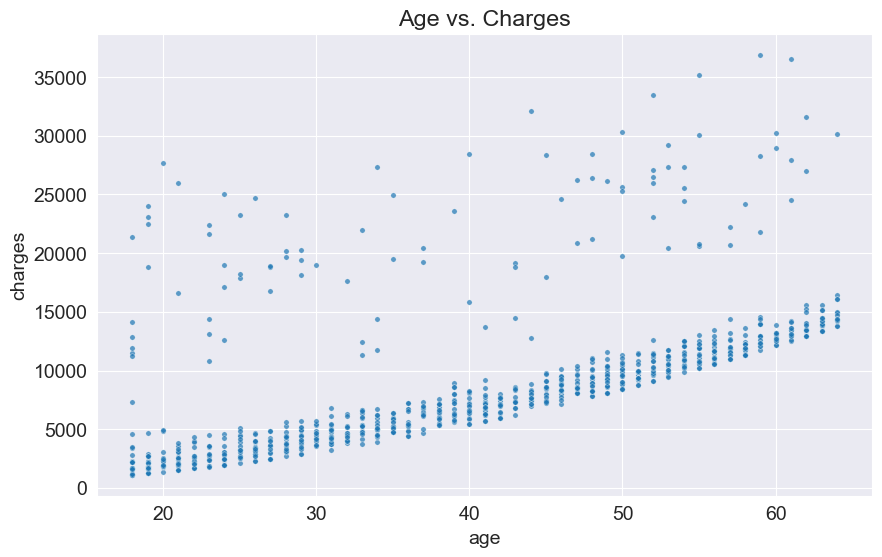

In [685]:
plt.title('Age vs. Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15);

**Model**
Apart from a few exceptions, the data points roughly align along a straight line.
We’ll attempt to **fit a line** through these points and use it to **predict medical charges** for a given age.

A straight line in an XY-coordinate system follows the equation:

[
y = w x + b
]

This line is defined by two parameters:

* **w** → the *slope* (how steep the line is)
* **b** → the *intercept* (where the line crosses the y-axis)

---

### Model

In our case:

* The **x-axis** represents *age*
* The **y-axis** represents *charges*

We’re assuming a linear relationship between the two:

[
charges = w \times age + b
]

Our goal is to determine the values of **w** and **b** that produce the line that best fits the data.

This approach is known as **linear regression**.
The equation above is a **linear regression model**, because it represents the relationship between *age* and *charges* using a straight line.

* The parameters **w** and **b** are often called the **weights** or **coefficients** of the model.
* The values in the *age* column are the **inputs** (features).
* The corresponding *charges* values are the **targets** (labels).

Finally, let’s define a helper function called `estimate_charges` to compute predicted `charges` for a given `age`, given specific values of `w` and `b`.

In [686]:
def estimate_charges(age, w, b):
    return w * age + b

lets guess the values of w and b 

In [687]:
w = 50
b = 100

In [688]:
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, w, b)

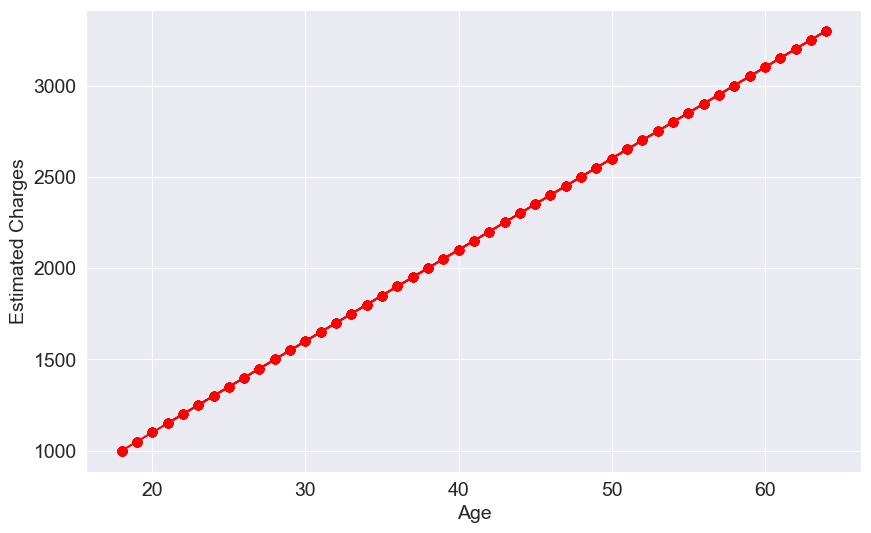

In [689]:
plt.plot(ages, estimated_charges, 'r-o');
plt.xlabel('Age');
plt.ylabel('Estimated Charges');

we can overlay this line with the actual data 

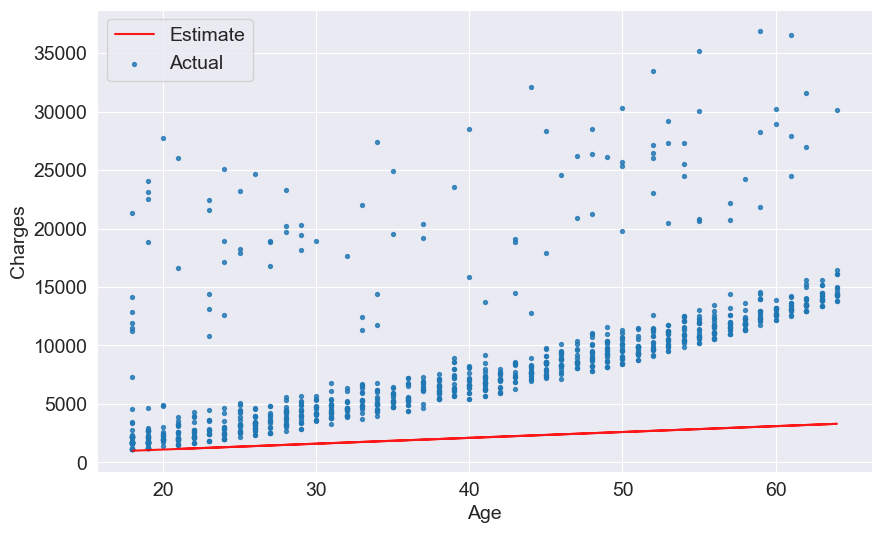

In [690]:
target = non_smoker_df.charges

plt.plot(ages, estimated_charges, 'r', alpha=0.9);
plt.scatter(ages, target, s=8,alpha=0.8);
plt.xlabel('Age');
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual']);

Clearly, the our estimates are quite poor and the line does not "fit" the data. However, we can try different values of $w$ and $b$ to move the line around. Let's define a helper function `try_parameters` which takes `w` and `b` as inputs and creates the above plot.

In [691]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    
    estimated_charges = estimate_charges(ages, w, b)
    
    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

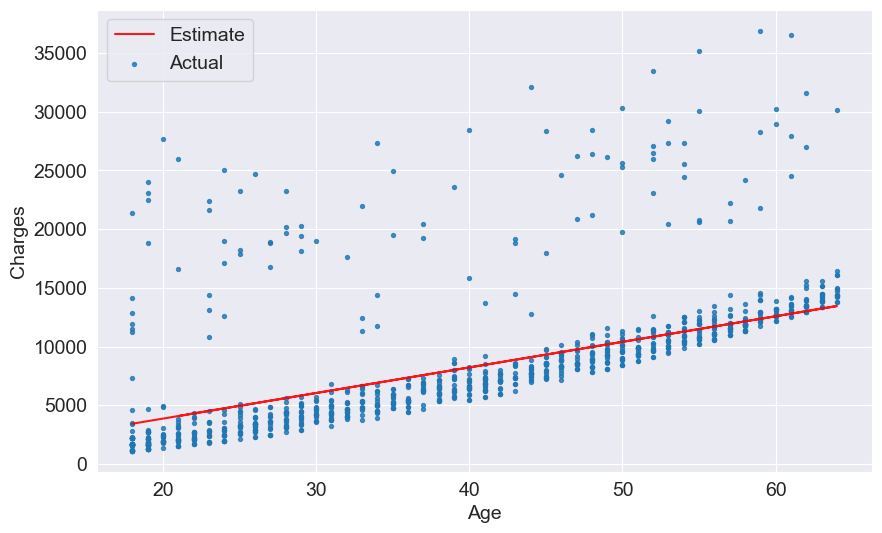

In [692]:
try_parameters(218, -500)



Imagine you’re trying to draw a straight line through a scatter of points on paper.
Each point represents a person — their **age** on the x-axis, and their **medical charges** on the y-axis.

You start by guessing where the line should go.
You move it up or down, tilt it a little to the left or right…
You’re trying to get it to pass *as close as possible* to all the points.
That’s you, **learning by trial and error** how “age” and “charges” are related.

Now imagine the computer doing the same thing — but a thousand times faster.
It can try hundreds of different lines, each with different values of ( w ) (the slope) and ( b ) (the intercept), and figure out which line fits the data best.

To make that happen, the computer needs to do two things:

1. **Measure how good the line is.**
   It needs a number — a kind of “score” — that tells it how far the line’s predictions are from the actual data points.
   (If the line misses most of the points, the score will be bad; if it’s close, the score will be good.)

2. **Learn how to improve the line.**
   Once it knows how far off it is, it needs a way to *adjust* ( w ) and ( b ) — moving the line slightly until it fits better.

If the computer keeps repeating this — measuring, adjusting, improving — it eventually **learns the best line** all by itself.
That’s what we call **training a linear regression model**: teaching the computer to find the relationship between *age* and *charges* automatically.




In [693]:
!pip install numpy --quiet


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [694]:
import numpy as np

In [695]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [696]:
w = 50
b = 100

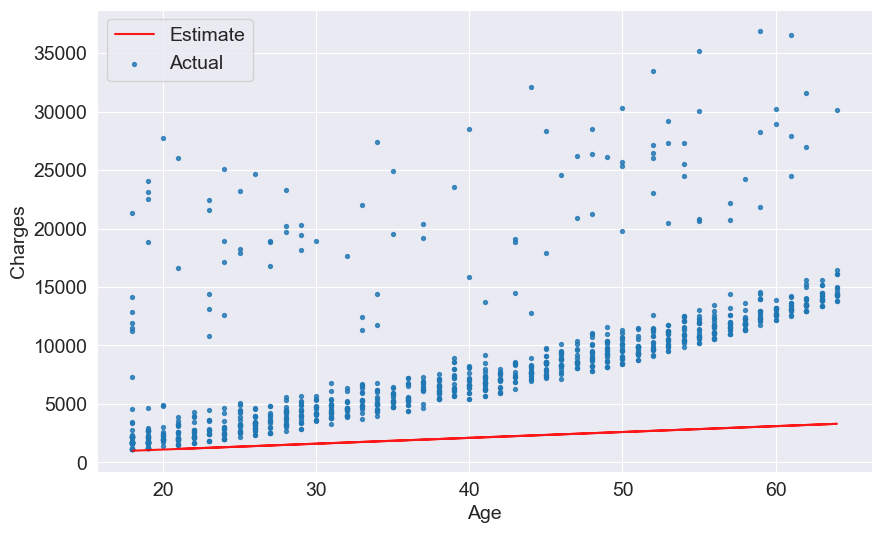

In [697]:
try_parameters(w, b)

In [698]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)

In [699]:
rmse(targets, predicted)

np.float64(8461.949562575493)

Here's how we can interpret the above number: *On average, each element in the prediction differs from the actual target by \\$8461*. 

The result is called the *loss* because it indicates how bad the model is at predicting the target variables. It represents information loss in the model: the lower the loss, the better the model.

Let's modify the `try_parameters` functions to also display the loss.

In [700]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)
    
    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);
    
    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

RMSE Loss:  8461.949562575493


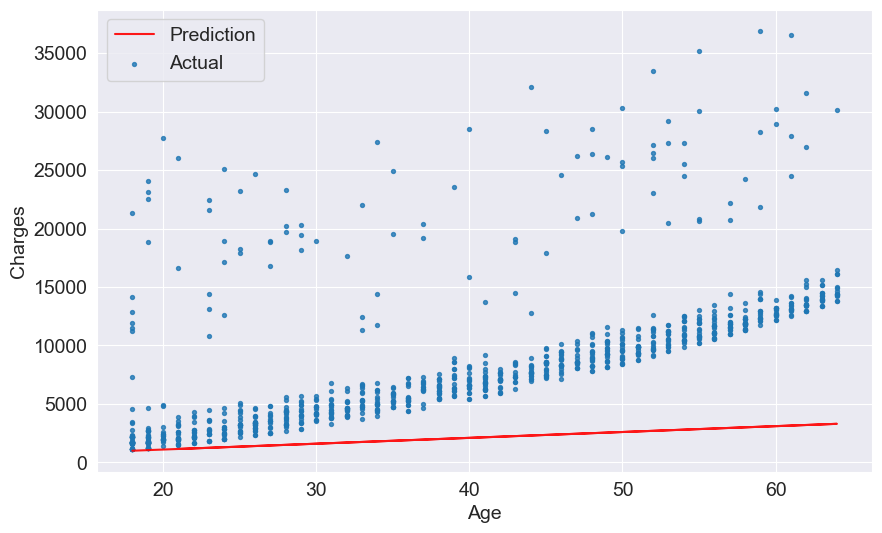

In [701]:
try_parameters(50, 100)

**Linear Regression using scikit-learn**

In [702]:
!pip install scikit-learn --quiet


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [703]:
from sklearn.linear_model import LinearRegression

In [704]:
model = LinearRegression()

In [705]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
print('inputs.shape :', inputs.shape)
print('targes.shape :', targets.shape)

inputs.shape : (1064, 1)
targes.shape : (1064,)


In [706]:
model.fit(inputs, targets)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


We can now make some predictions using the moel, lets try predicting the charges for ages 23,37,61

In [707]:
model.predict(np.array([[23], 
                        [37], 
                        [61]]))

c:\Users\utilisateur\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

Lets compute the prediction for the entire set  

In [708]:
predictions = model.predict(inputs)

In [709]:
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289], shape=(1064,))

In [710]:
rmse(targets, predictions)

np.float64(4662.505766636395)

The parameters of the model are stored in the `coef_` and `intercept_` properties.

In [711]:
# w
model.coef_

array([267.24891283])

In [712]:
# b
model.intercept_

np.float64(-2091.4205565650864)

Lets visualise these parameters

RMSE Loss:  4662.505766636395


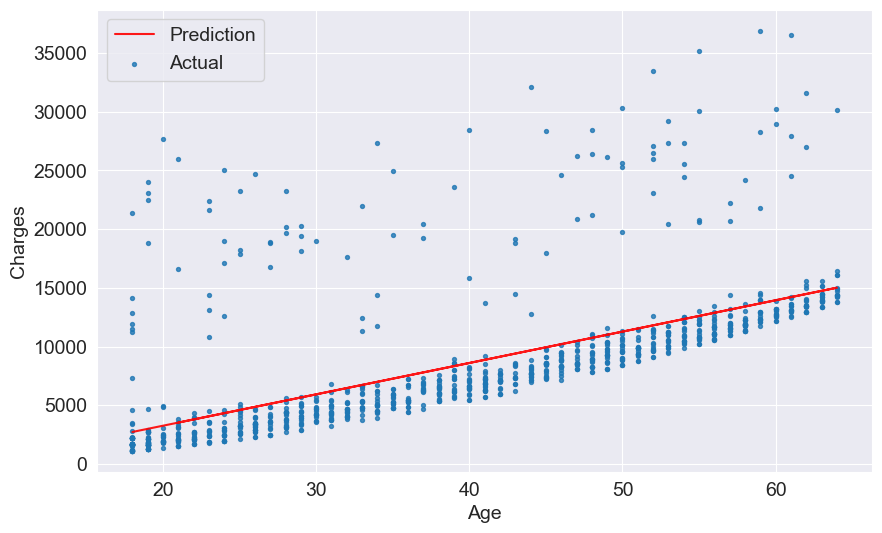

In [713]:
try_parameters(model.coef_, model.intercept_)

## Linear Regression using Multiple Features

So far, we've used on the "age" feature to estimate "charges". Adding another feature like "bmi" is fairly straightforward. We simply assume the following relationship:

$charges = w_1 \times age + w_2 \times bmi + b$

We need to change just one line of code to include the BMI.

In [714]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age', 'bmi']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.3128354612945


In [715]:
non_smoker_df.charges.corr(non_smoker_df.bmi)

np.float64(0.0840365431283327)

In [716]:
fig = px.scatter(non_smoker_df, x='bmi', y='charges', title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [717]:
fig = px.scatter_3d(non_smoker_df, x='age', y='bmi', z='charges')
fig.update_traces(marker_size=3, marker_opacity=0.5)
fig.show()

You can see that it's harder to interpret a 3D scatter plot compared to a 2D scatter plot. As we add more features, it becomes impossible to visualize all feature at once, which is why we use measures like correlation and loss. 

Let's also check the parameters of the model.

In [718]:
model.coef_, model.intercept_

(array([266.87657817,   7.07547666]), np.float64(-2293.6320906488727))


## Using Categorical Features in Machine Learning

Up to now, we’ve only worked with **numerical columns**, because computers can only perform calculations with numbers.
But what if we want to include columns like `"smoker"` in our model?

If we convert these **categorical columns** (those with text values like *yes/no* or *male/female*) into numbers, we can train **one single model** using all the information in the dataset.

There are a few common ways to convert categorical data into numbers:

1. **Binary Encoding (0–1):**
   If a column has only **two categories** (e.g., *yes* and *no*), we can simply replace them with 0 and 1.
   Example: `"smoker"` → `no = 0`, `yes = 1`.

2. **One-Hot Encoding:**
   If a column has **more than two categories** (e.g., *north*, *south*, *east*, *west*),
   we create a **new column for each category**, filled with 1s and 0s.
   For example, `"region"` might become `region_north`, `region_south`, etc.

3. **Ordinal Encoding:**
   If the categories have a **natural order** (like *cold*, *warm*, *hot*),
   we can map them to numbers while **preserving the order**.
   Example: `cold = 1`, `warm = 2`, `hot = 3`.

## Binary Categories

The "smoker" category has just two values "yes" and "no". Let's create a new column "smoker_code" containing 0 for "no" and 1 for "yes".

In [719]:
smoker_codes = {'no': 0, 'yes': 1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)

lets do that for sex as well 

<Axes: xlabel='sex', ylabel='charges'>

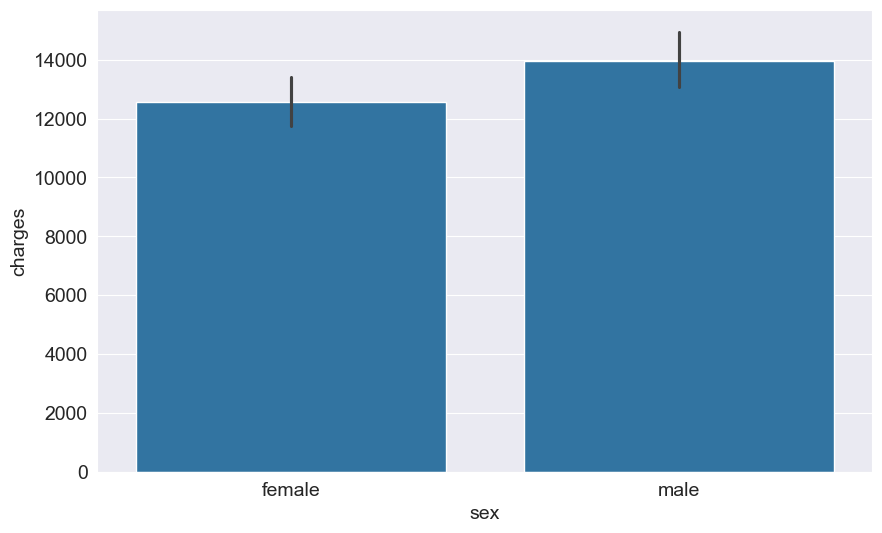

In [720]:
sns.barplot(data=medical_df, x='sex', y='charges')

In [721]:
sex_codes = {'female': 0, 'male': 1}


In [722]:
medical_df['sex_code'] = medical_df.sex.map(sex_codes)

In [723]:
medical_df.charges.corr(medical_df.sex_code)

np.float64(0.05729206220202531)

Lets add region as well  using **one hot encoding**

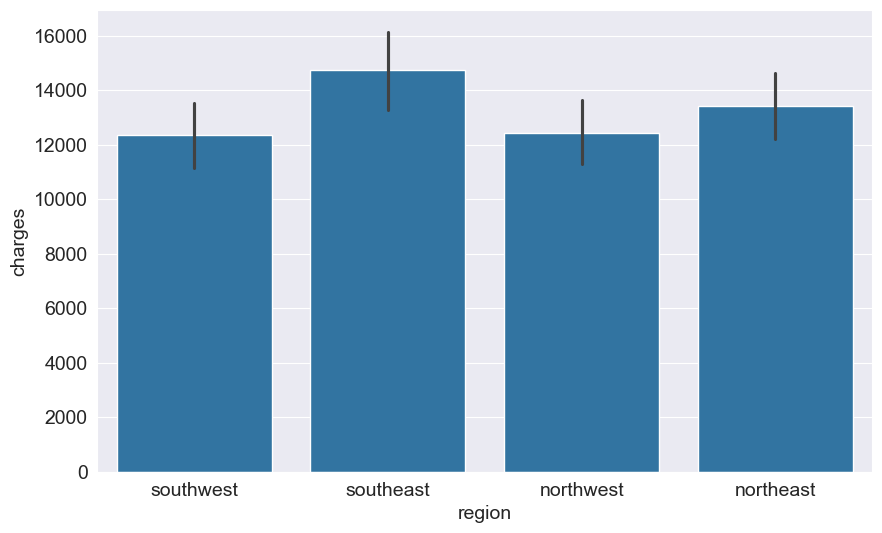

In [724]:
sns.barplot(data=medical_df, x='region', y='charges');

In [725]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [726]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]], shape=(1338, 4))

In [727]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

In [728]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


   Now our model can be written as :
$charges = w_1 \times age + w_2 \times bmi + w_3 \times charges + w_4 \times smoker + w_5 \times sex + w_6 \times region + b$

In [729]:
# Create inputs and targets
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = medical_df[input_cols], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.6796511744515


## Model Enhancements

Let's explore and implement additional improvements to our model.

### Feature Scaling

As part of the regulatory requirements, we must be able to **justify and interpret** the predictions generated by our model.

The model follows the general linear regression equation:

[
charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + w_5 \times sex + w_6 \times region + b
]

When attempting to **compare the relative importance** of each feature, our initial thought might be to directly examine their corresponding weights.

In [730]:
model.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [731]:
model.intercept_

np.float64(-12525.547811195444)

In [732]:
weights_df = pd.DataFrame({
    'feature': np.append(input_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df

,feature,weight
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_code,23848.534542
4,sex_code,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,-12525.547811


In [733]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [734]:
from sklearn.preprocessing import StandardScaler

In [735]:
numeric_cols = ['age', 'bmi', 'children'] 
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])

,copy,True
,with_mean,True
,with_std,True


In [736]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [737]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [738]:
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]], shape=(1338, 3))

In [739]:
cat_cols = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = medical_df[cat_cols].values

In [740]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
3,smoker_code,23848.534542
5,northeast,587.009235
2,children,475.500545
1,bmi,339.193454
0,age,256.856353
6,northwest,234.045336
4,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814
9,1,-12525.547811


**The goal of a machine learning model**

When we train a model, our real goal isn’t just to make good predictions on the data we already have —
it’s to build a model that will make good predictions on new, unseen data in the future.

That’s what we call generalization.


In [741]:
from sklearn.model_selection import train_test_split

In [742]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.1)

In [743]:
# Create and train the model
model = LinearRegression().fit(inputs_train, targets_train)

# Generate predictions
predictions_test = model.predict(inputs_test)

# Compute loss to evalute the model
loss = rmse(targets_test, predictions_test)
print('Test Loss:', loss)

Test Loss: 6014.071797279945


In [744]:
# Generate predictions
predictions_train = model.predict(inputs_train)

# Compute loss to evalute the model
loss = rmse(targets_train, predictions_train)
print('Training Loss:', loss)

Training Loss: 6046.401702239003


If we only checked the training loss, we’d have no idea how well the model will perform on new data — because it might just be memorizing patterns instead of learning general trends.

By also checking the test loss, we can measure how well the model can generalize.